In [1]:
!pip install tensorflow scikit-learn statsmodels

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Unzip the uploaded dataset (change path if needed)
import zipfile, os

zip_path = '/content/drive/MyDrive/archive (15).zip'  # <--- update with your actual path
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List files to confirm
os.listdir(extract_path)

['bbc-fulltext (document classification)', 'bbc']

In [7]:
import os
import pandas as pd

# Path to the extracted dataset folder
base_path = '/content/dataset/bbc-fulltext (document classification)/bbc'

# Prepare lists to store data
texts = []
labels = []

# Walk through folders
for category in os.listdir(base_path):
    category_path = os.path.join(base_path, category)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            with open(file_path, 'r', encoding='latin-1') as file:
                text = file.read()
                texts.append(text)
                labels.append(category)

# Create dataframe
df = pd.DataFrame({'text': texts, 'label': labels})

# Preview
print(df.head())
print(df['label'].value_counts())

                                                text label
0  Games maker fights for survival\n\nOne of Brit...  tech
1  Apple iPod family expands market\n\nApple has ...  tech
2  Bond game fails to shake or stir\n\nFor gaming...  tech
3  Digital UK driven by net and TV\n\nThe UK's ad...  tech
4  Media gadgets get moving\n\nPocket-sized devic...  tech
label
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
# Tokenize text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, padding='post')
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df['label_encoded'], test_size=0.2, random_state=42)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, padding='post')
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df['label_encoded'], test_size=0.2, random_state=42)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=X_train.shape[1]),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 48s 975ms/step - accuracy: 0.2551 - loss: 1.5992 - val_accuracy: 0.2584 - val_loss: 1.5459
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 79s 919ms/step - accuracy: 0.5045 - loss: 1.4341 - val_accuracy: 0.7107 - val_loss: 0.9033
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 84s 974ms/step - accuracy: 0.8199 - loss: 0.6352 - val_accuracy: 0.9213 - val_loss: 0.3343
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 43s 967ms/step - accuracy: 0.9619 - loss: 0.1801 - val_accuracy: 0.9298 - val_loss: 0.2047
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 80s 929ms/step - accuracy: 0.9950 - loss: 0.0614 - val_accuracy: 0.9551 - val_loss: 0.1622


In [13]:
from tensorflow.keras.layers import LSTM

lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=X_train.shape[1]),
    LSTM(64),
    Dense(len(le.classes_), activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 218s 5s/step - accuracy: 0.2096 - loss: 1.6092 - val_accuracy: 0.2303 - val_loss: 1.5964
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 260s 5s/step - accuracy: 0.2323 - loss: 1.6080 - val_accuracy: 0.2303 - val_loss: 1.5980
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.2175 - loss: 1.6006 - val_accuracy: 0.2303 - val_loss: 1.6010
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 214s 5s/step - accuracy: 0.2288 - loss: 1.6040 - val_accuracy: 0.2303 - val_loss: 1.5979
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.2141 - loss: 1.6027 - val_accuracy: 0.2303 - val_loss: 1.5996


In [14]:
from scipy import stats
import numpy as np

# Predictions
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=1)

# Z-Test
z_stat, p_val = stats.ttest_ind(y_pred_cnn, y_pred_lstm)
print(f'Z-Test statistic: {z_stat}, p-value: {p_val}')

# T-Test
t_stat, p_val = stats.ttest_ind(y_pred_cnn, y_pred_lstm)
print(f'T-Test statistic: {t_stat}, p-value: {p_val}')

# Type I Error = probability of rejecting a true null (alpha)
alpha = 0.05
print(f'Type I Error Rate (alpha): {alpha}')

# Type II Error (simulated power analysis)
beta = 1 - stats.norm.cdf(stats.norm.ppf(1-alpha) - (np.mean(y_pred_cnn) - np.mean(y_pred_lstm))/np.std(y_pred_cnn))
print(f'Estimated Type II Error Rate (beta): {beta}')

# ANOVA Test
anova_result = stats.f_oneway(y_pred_cnn, y_pred_lstm)
print(f'ANOVA Result: {anova_result}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 332ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 644ms/step
Z-Test statistic: -14.55731677611431, p-value: 3.273490254187875e-43
T-Test statistic: -14.55731677611431, p-value: 3.273490254187875e-43
Type I Error Rate (alpha): 0.05
Estimated Type II Error Rate (beta): 0.009753094226143788
ANOVA Result: F_onewayResult(statistic=np.float64(211.91547172013935), pvalue=np.float64(3.2734902541899808e-43))


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 697ms/step


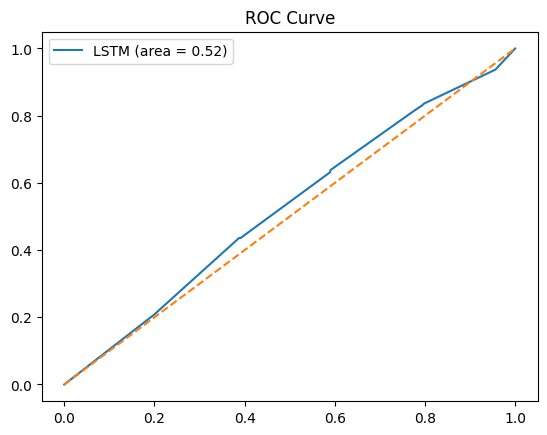

In [15]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize labels
y_test_bin = label_binarize(y_test, classes=range(len(le.classes_)))
y_score = lstm_model.predict(X_test)

# Compute ROC
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'LSTM (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.legend()
plt.show()

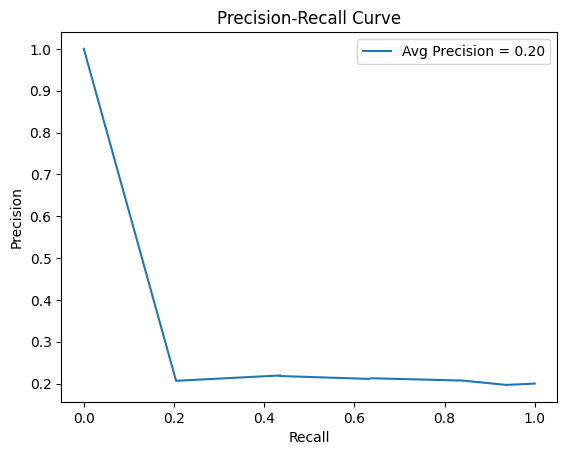

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
avg_precision = average_precision_score(y_test_bin, y_score)

plt.plot(recall, precision, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lstm, target_names=le.classes_))

               precision    recall  f1-score   support

     business       0.00      0.00      0.00       102
entertainment       0.00      0.00      0.00        76
     politics       0.00      0.00      0.00        90
        sport       0.21      1.00      0.34        92
         tech       0.00      0.00      0.00        85

     accuracy                           0.21       445
    macro avg       0.04      0.20      0.07       445
 weighted avg       0.04      0.21      0.07       445



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
